In [3]:
from src.data import load_multiple_files

items_df_paths = [
    '../../data/raw/meta_All_Beauty.jsonl/meta_All_Beauty.jsonl',
    '../../data/raw/meta_Appliances.jsonl/meta_Appliances.jsonl',
    '../../data/raw/meta_CDs_and_Vinyl.jsonl/meta_CDs_and_Vinyl.jsonl',
    '../../data/raw/meta_Health_and_Personal_Care.jsonl/meta_Health_and_Personal_Care.jsonl',
    '../../data/raw/meta_Industrial_and_Scientific.jsonl/meta_Industrial_and_Scientific.jsonl',
]

reviews_df_paths = [
    '../../data/raw/All_Beauty.jsonl/All_Beauty.jsonl',
    '../../data/raw/Appliances.jsonl/Appliances.jsonl',
    '../../data/raw/CDs_and_Vinyl.jsonl/CDs_and_Vinyl.jsonl',
    '../../data/raw/Health_and_Personal_Care.jsonl/Health_and_Personal_Care.jsonl',
    '../../data/raw/Industrial_and_Scientific.jsonl/Industrial_and_Scientific.jsonl',
]

items_df = load_multiple_files(items_df_paths)
reviews_df = load_multiple_files(reviews_df_paths)

In [25]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396733 entries, 0 to 1396732
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   main_category    1370945 non-null  object 
 1   title            1396733 non-null  object 
 2   average_rating   1396733 non-null  float64
 3   rating_number    1396733 non-null  int64  
 4   features         1396733 non-null  object 
 5   description      1396733 non-null  object 
 6   price            850581 non-null   object 
 7   images           1396733 non-null  object 
 8   videos           1396733 non-null  object 
 9   store            1377879 non-null  object 
 10  categories       1396733 non-null  object 
 11  details          1396733 non-null  object 
 12  parent_asin      1396733 non-null  object 
 13  bought_together  0 non-null        float64
 14  subtitle         788 non-null      object 
 15  author           500 non-null      object 
dtypes: float64(2), int

###  Nombre moyen d’achats par utilisateur et son écart-type

In [15]:
# Number of purchases per user
purchases_per_user = reviews_df['user_id'].value_counts()

# Mean and standard deviation of purchases per user
mean_purchases = purchases_per_user.mean()
std_purchases = purchases_per_user.std()

print(f"Nombre moyen d'achats par utilisateur : {mean_purchases:.2f}")
print(f"Écart-type : {std_purchases:.2f}")
print(f"\nNombre total d'utilisateurs : {len(purchases_per_user)}")
print(f"Médiane d'achats par utilisateur : {purchases_per_user.median():.2f}")

Nombre moyen d'achats par utilisateur : 1.92
Écart-type : 5.54

Nombre total d'utilisateurs : 6944793
Médiane d'achats par utilisateur : 1.00


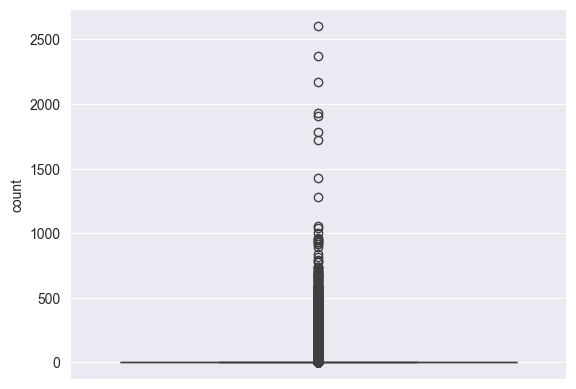

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y=purchases_per_user)
plt.show()

### Les outliers

In [7]:
lower_bound = mean_purchases - 2 * std_purchases
upper_bound = mean_purchases + 2 * std_purchases

print(f"Intervalle : [{lower_bound:.2f}, {upper_bound:.2f}]")

Intervalle : [-9.15, 12.99]


In [8]:
outliers = purchases_per_user[(purchases_per_user < lower_bound) | (purchases_per_user > upper_bound)]

print(f"\nNombre d'utilisateurs outliers : {len(outliers)}")
print(f"Pourcentage d'outliers : {(len(outliers) / len(purchases_per_user) * 100):.2f}%")

print("\nStatistiques des outliers :")
print(outliers.describe())

print("\nExemples d'utilisateurs outliers (top 10 par nombre d'achats) :")
print(outliers.sort_values(ascending=False).head(10))


Nombre d'utilisateurs outliers : 69794
Pourcentage d'outliers : 1.00%

Statistiques des outliers :
count    69794.000000
mean        29.398444
std         45.679182
min         13.000000
25%         15.000000
50%         19.000000
75%         28.000000
max       2602.000000
Name: count, dtype: float64

Exemples d'utilisateurs outliers (top 10 par nombre d'achats) :
user_id
AHACUCDYWYSRABKYXOLDMTDP2NQQ_1    2602
AH3FC6V3IUJIN2Y7BCZ7DN3IMMJQ      2373
AGAFM74L2RIJ5O36NNYH4Z5ISQNQ      2171
AF2QM5NTJ52WVY7GOGHVQJNU5IMA      1933
AHV7YABLRZY3XCL2Q7JVHSQRPMNQ      1903
AHEDJIDSPVYCB3GPRZKGO7YTK6XQ      1784
AHXNZ75VJUMZ34ASD2BFHTPRD6BA      1724
AEBMZ7Q2F2EHZ4CTOCJDNQMHMZ3Q      1425
AEB3334PRZKEQMRTCM7NJUDEV6MQ      1276
AHYV5OBMMFAHQDZ63FJ2JGIC6OTQ      1053
Name: count, dtype: int64


### Moyenne et écart-type des notes par produit

In [13]:
items_rating_mean = items_df['average_rating'].mean()
items_rating_std = items_df['average_rating'].std()

print(f"\nMoyenne des rating par produit : {items_rating_mean:.1f}")
print(f"Ecart-type des rating par produit : {items_rating_std:.1f}")


Moyenne des rating par produit : 4.3
Ecart-type des rating par produit : 0.7


### Outliers des prix des produits

In [27]:
import pandas as pd

# Convert price to numeric, forcing non-numeric values to NaN
items_df['price'] = pd.to_numeric(items_df['price'], errors='coerce')

# Drop NaN values
prices = items_df['price'].dropna()

# IQR
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]

print(f"Moyenne : {prices.mean():.2f}, Médiane : {prices.median():.2f}")
print(f"Intervalle normal : [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Outliers : {len(outliers)} ({len(outliers)/len(prices)*100:.2f}%)")

# DataFrame of outliers
items_outliers = items_df[(items_df['price'] < lower_bound) | (items_df['price'] > upper_bound)]

# DataFrame filtered without outliers
items_df_filtered = items_df[(items_df['price'] >= lower_bound) & (items_df['price'] <= upper_bound)]

Moyenne : 40.81, Médiane : 17.78
Intervalle normal : [-22.72, 66.96]
Outliers : 95820 (11.27%)


### Nombre d'achats par marque

In [28]:
# Joindre les reviews avec les items pour obtenir les marques
reviews_with_brand = reviews_df.merge(
    items_df[['parent_asin', 'store']],
    on='parent_asin',
    how='left'
)

# Compter le nombre d'achats par marque
purchases_per_brand = reviews_with_brand['store'].value_counts()

print(f"Nombre total de marques : {len(purchases_per_brand)}")
print(f"\nTop 20 marques par nombre d'achats :\n")
print(purchases_per_brand.head(20))

# Statistiques
print(f"\nStatistiques des achats par marque :")
print(f"Moyenne : {purchases_per_brand.mean():.2f}")
print(f"Médiane : {purchases_per_brand.median():.2f}")
print(f"Écart-type : {purchases_per_brand.std():.2f}")


Nombre total de marques : 432886

Top 20 marques par nombre d'achats :

store
Whirlpool                                        138862
GE                                                84229
Various Artists  (Artist)    Format: Audio CD     75522
FRIGIDAIRE                                        64101
uxcell                                            50394
BlueStars                                         47929
WATERDROP                                         45623
Gorilla                                           41574
SAMSUNG                                           40492
LG                                                36721
Rubbermaid                                        32602
VARIOUS ARTISTS  (Artist)    Format: Audio CD     31039
Bissell                                           27856
K&J                                               27320
Etekcity                                          24696
Various  (Artist)    Format: Audio CD             24548
3M                        

C:\Users\jackl\AppData\Local\Temp\ipykernel_6768\2075738395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='viridis')


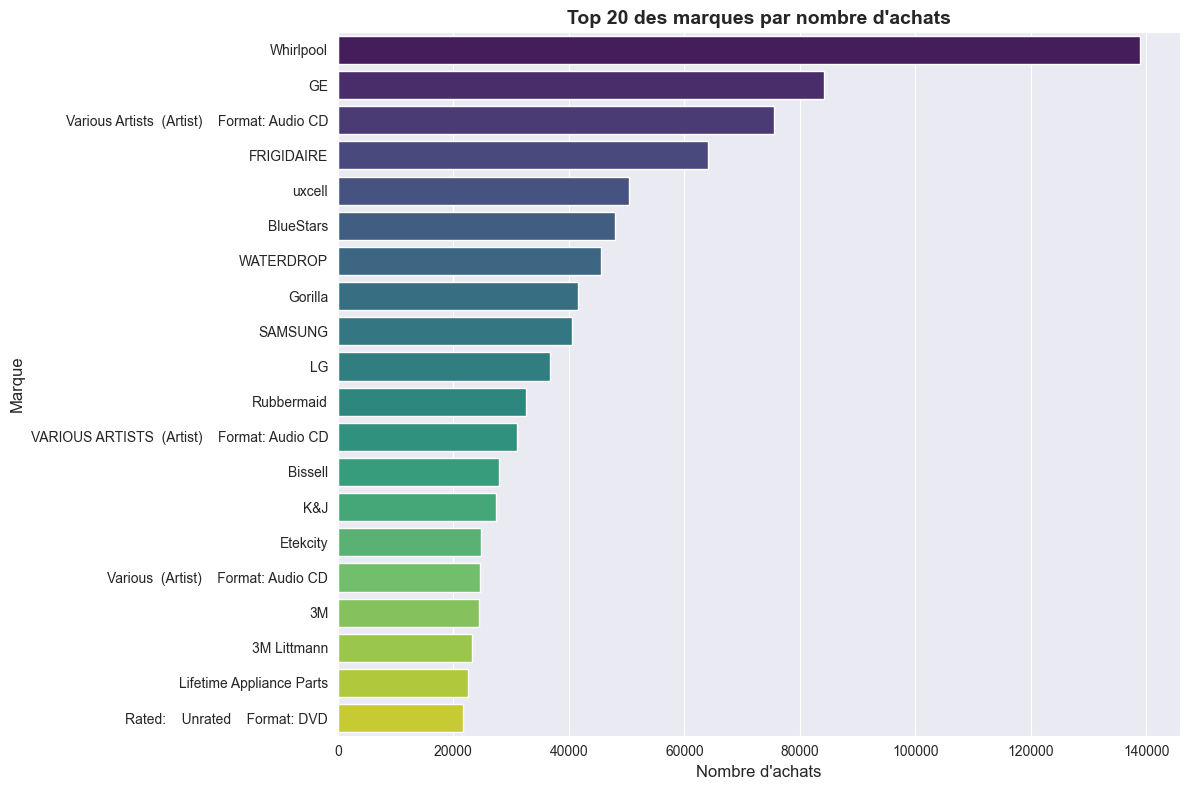

In [33]:
# Visualisation - Top 20 marques
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
top_20_brands = purchases_per_brand.head(20)

sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='viridis')
plt.xlabel('Nombre d\'achats', fontsize=12)
plt.ylabel('Marque', fontsize=12)
plt.title('Top 20 des marques par nombre d\'achats', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Detecter les doublons dans le dataset

In [36]:
print(f"\nNombre total de produits : {len(items_df)}")

# Common keys in Amazon data: 'parent_asin', 'asin', 'main_category'
key_columns = ['parent_asin']

# 1. Doublons complets based on key columns only
duplicate_rows_items = items_df.duplicated(subset=key_columns).sum()
print(f"\nDoublons basés sur {key_columns} : {duplicate_rows_items}")

if duplicate_rows_items > 0:
    print(f"Il y a {duplicate_rows_items} lignes dupliquées")
    # Show some examples of duplicates
    duplicates = items_df[items_df.duplicated(subset=key_columns, keep=False)]
    print("\nExemples de doublons :")
    print(duplicates[key_columns].head())

    # Remove duplicates
    items_df = items_df.drop_duplicates(subset=key_columns).copy()
    print(f"\nNombre de produits après suppression des doublons : {len(items_df)}")
else:
    print("Aucun doublon détecté")



Nombre total de produits : 1396733

Doublons basés sur ['parent_asin'] : 0
Aucun doublon détecté


### Nombre de produits dispo par fabricant

In [37]:

# Calculer le nombre de produits disponibles par fabricant
products_per_manufacturer = items_df['store'].value_counts()

print(f"Nombre total de fabricants : {len(products_per_manufacturer)}")
print(f"\nTop 20 fabricants par nombre de produits disponibles :\n")
print(products_per_manufacturer.head(20))

# Statistiques
print(f"\nStatistiques des produits par fabricant :")
print(f"Moyenne : {products_per_manufacturer.mean():.2f}")
print(f"Médiane : {products_per_manufacturer.median():.2f}")
print(f"Écart-type : {products_per_manufacturer.std():.2f}")
print(f"Min : {products_per_manufacturer.min()}")
print(f"Max : {products_per_manufacturer.max()}")

# Fabricants avec un seul produit
single_product_manufacturers = products_per_manufacturer[products_per_manufacturer == 1]
print(f"\nNombre de fabricants avec un seul produit : {len(single_product_manufacturers)} ({len(single_product_manufacturers)/len(products_per_manufacturer)*100:.2f}%)")

Nombre total de fabricants : 432998

Top 20 fabricants par nombre de produits disponibles :

store
Various Artists  (Artist)    Format: Audio CD    16936
uxcell                                           14573
Whirlpool                                         8757
VARIOUS ARTISTS  (Artist)    Format: Audio CD     7873
Format: Audio CD                                  7569
Small Parts                                       5573
GE                                                5246
Generic                                           3489
FRIGIDAIRE                                        3072
Various  (Artist)    Format: Audio CD             3014
The Hillman Group                                 2663
D&D PowerDrive                                    2457
SAMSUNG                                           2282
SmartSign                                         2231
Format: Vinyl                                     2195
LG                                                1913
UpStart Components   

C:\Users\jackl\AppData\Local\Temp\ipykernel_6768\2847243475.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_manufacturers.values, y=top_20_manufacturers.index, palette='magma')


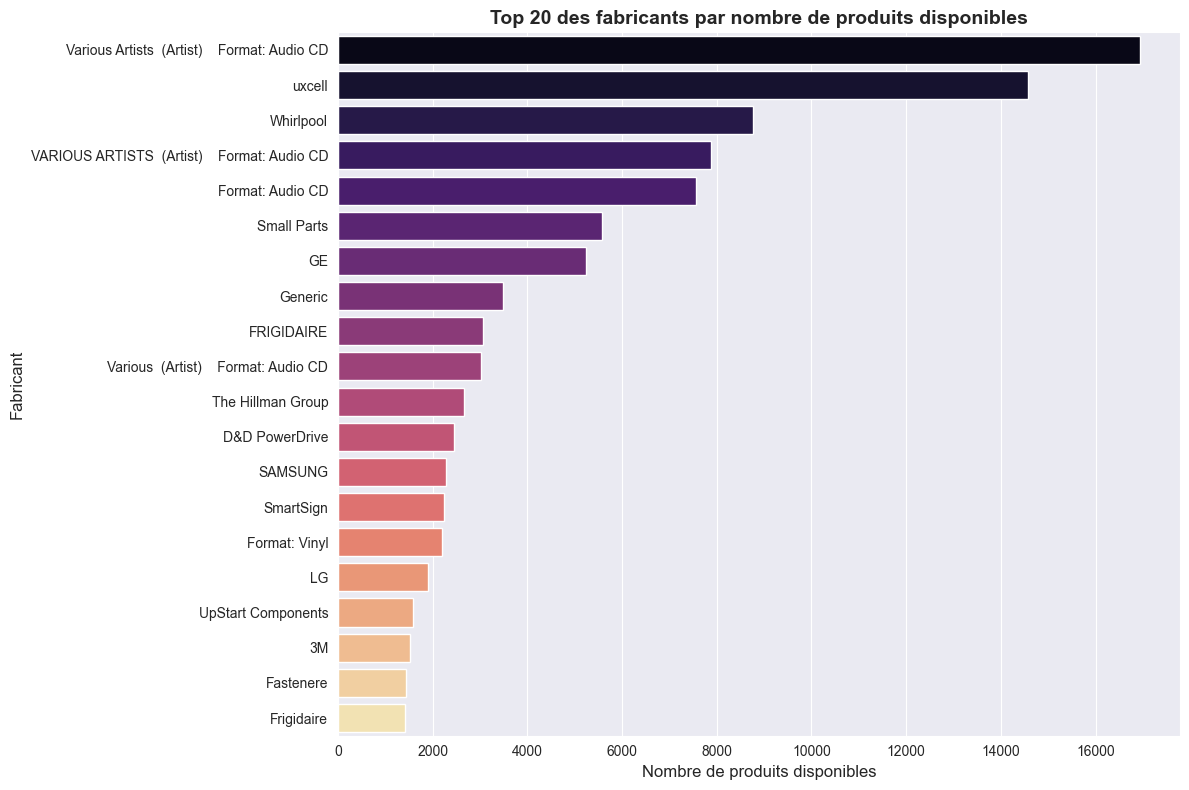

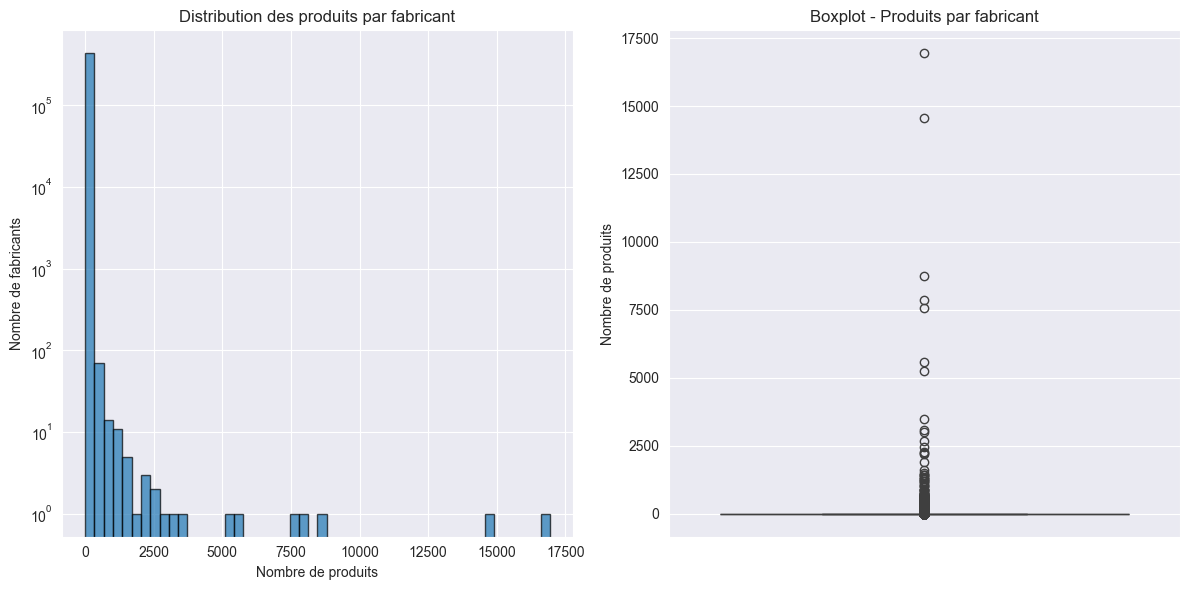

In [38]:
plt.figure(figsize=(12, 8))
top_20_manufacturers = products_per_manufacturer.head(20)

sns.barplot(x=top_20_manufacturers.values, y=top_20_manufacturers.index, palette='magma')
plt.xlabel('Nombre de produits disponibles', fontsize=12)
plt.ylabel('Fabricant', fontsize=12)
plt.title('Top 20 des fabricants par nombre de produits disponibles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Distribution du nombre de produits par fabricant
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(products_per_manufacturer, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Nombre de produits')
plt.ylabel('Nombre de fabricants')
plt.title('Distribution des produits par fabricant')
plt.yscale('log')  # Échelle logarithmique pour mieux voir la distribution

plt.subplot(1, 2, 2)
sns.boxplot(y=products_per_manufacturer)
plt.ylabel('Nombre de produits')
plt.title('Boxplot - Produits par fabricant')

plt.tight_layout()
plt.show()


### Analyse des relations bought_together

In [48]:
items_df['bought_together'].unique()

array([nan])

Tout les produits ont NaN dans bought_together

### Analyse de l'évolution des notes au cours de l'année
#### 1. Vérifier et préparer les données temporelles

In [56]:
reviews_df['date'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')

# Extraire des informations temporelles
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
reviews_df['year_month'] = reviews_df['date'].dt.to_period('M')
reviews_df['quarter'] = reviews_df['date'].dt.quarter
reviews_df['day_of_year'] = reviews_df['date'].dt.dayofyear
reviews_df['week'] = reviews_df['date'].dt.isocalendar().week

print(f"\nPériode couverte par les données :")
print(f"  Première review : {reviews_df['date'].min()}")
print(f"  Dernière review : {reviews_df['date'].max()}")
print(f"  Durée totale : {(reviews_df['date'].max() - reviews_df['date'].min()).days} jours")
print(f"\nNombre total de reviews : {len(reviews_df)}")

# Années disponibles
print(f"\nAnnées présentes dans les données :")
print(reviews_df['year'].value_counts().sort_index())

ÉVOLUTION DES NOTES AU COURS DE L'ANNÉE

Période couverte par les données :
  Première review : 1997-09-09 03:13:17
  Dernière review : 2023-09-12 17:40:25.306000
  Durée totale : 9499 jours

Nombre total de reviews : 13334532

Années présentes dans les données :
year
1997         24
1998       7383
1999      27134
2000      95363
2001      90007
2002      95550
2003     110654
2004     129273
2005     165311
2006     139354
2007     151157
2008     130240
2009     132046
2010     132755
2011     150488
2012     216173
2013     495916
2014     735476
2015    1002907
2016    1072664
2017    1054314
2018    1053068
2019    1311693
2020    1459716
2021    1575847
2022    1310492
2023     489527
Name: count, dtype: int64


#### 2. Évolution des notes moyennes par mois

In [57]:
# Notes moyennes par mois
monthly_ratings = reviews_df.groupby('year_month').agg({
    'rating': ['mean', 'median', 'count', 'std']
}).round(2)

monthly_ratings.columns = ['mean_rating', 'median_rating', 'num_reviews', 'std_rating']
monthly_ratings = monthly_ratings.reset_index()
monthly_ratings['year_month_str'] = monthly_ratings['year_month'].astype(str)

print("Statistiques mensuelles (derniers 12 mois) :")
print(monthly_ratings.tail(12))

# Statistiques globales
print(f"\n--- Statistiques globales ---")
print(f"Note moyenne globale : {reviews_df['rating'].mean():.2f}")
print(f"Note médiane globale : {reviews_df['rating'].median():.2f}")
print(f"Écart-type global : {reviews_df['rating'].std():.2f}")



--- Évolution mensuelle des notes ---

Statistiques mensuelles (derniers 12 mois) :
    year_month  mean_rating  median_rating  num_reviews  std_rating  \
301    2022-10         4.07            5.0       107628        1.47   
302    2022-11         4.11            5.0       103848        1.45   
303    2022-12         4.13            5.0       111872        1.43   
304    2023-01         4.13            5.0       117995        1.43   
305    2023-02         4.07            5.0        97911        1.47   
306    2023-03         4.10            5.0       112843        1.45   
307    2023-04         4.02            5.0        66034        1.51   
308    2023-05         3.92            5.0        37981        1.57   
309    2023-06         3.90            5.0        23929        1.58   
310    2023-07         3.97            5.0        18686        1.55   
311    2023-08         4.09            5.0        13274        1.48   
312    2023-09         3.98            5.0          874        

#### 3. Évolution par année (si plusieurs années disponibles)

In [58]:
yearly_ratings = reviews_df.groupby('year').agg({
    'rating': ['mean', 'median', 'count', 'std']
}).round(2)

yearly_ratings.columns = ['mean_rating', 'median_rating', 'num_reviews', 'std_rating']

print(f"\n--- Évolution annuelle des notes ---\n")
print(yearly_ratings)

# Analyser la tendance
if len(yearly_ratings) > 1:
    first_year_rating = yearly_ratings.iloc[0]['mean_rating']
    last_year_rating = yearly_ratings.iloc[-1]['mean_rating']
    trend = last_year_rating - first_year_rating

    print(f"\nTendance globale : {'↑' if trend > 0 else '↓'} {abs(trend):.2f} points")



--- Évolution annuelle des notes ---

      mean_rating  median_rating  num_reviews  std_rating
year                                                     
1997         4.83            5.0           24        0.64
1998         4.55            5.0         7383        0.87
1999         4.45            5.0        27134        1.00
2000         4.40            5.0        95363        0.99
2001         4.37            5.0        90007        1.02
2002         4.36            5.0        95550        1.04
2003         4.31            5.0       110654        1.10
2004         4.25            5.0       129273        1.16
2005         4.23            5.0       165311        1.19
2006         4.29            5.0       139354        1.13
2007         4.37            5.0       151157        1.05
2008         4.36            5.0       130240        1.06
2009         4.38            5.0       132046        1.07
2010         4.36            5.0       132755        1.10
2011         4.35            5.0 

#### 4. Distribution des notes par période

In [59]:
# Analyser la dernière année complète
latest_year = reviews_df['year'].max()
reviews_latest_year = reviews_df[reviews_df['year'] == latest_year]

quarterly_distribution = pd.crosstab(
    reviews_latest_year['quarter'],
    reviews_latest_year['rating'],
    normalize='index'
) * 100

print(f"Distribution des notes par trimestre ({latest_year}) :")
print(quarterly_distribution.round(1))



--- Distribution des notes par trimestre ---

Distribution des notes par trimestre (2023) :
rating      1    2    3    4     5
quarter                           
1        13.3  4.9  6.2  9.7  65.9
2        16.4  5.3  6.3  9.1  62.9
3        15.7  5.1  6.0  8.4  64.9


#### 5. Visualisations détaillées
##### Visualisation 1 : Évolution des notes moyennes par mois

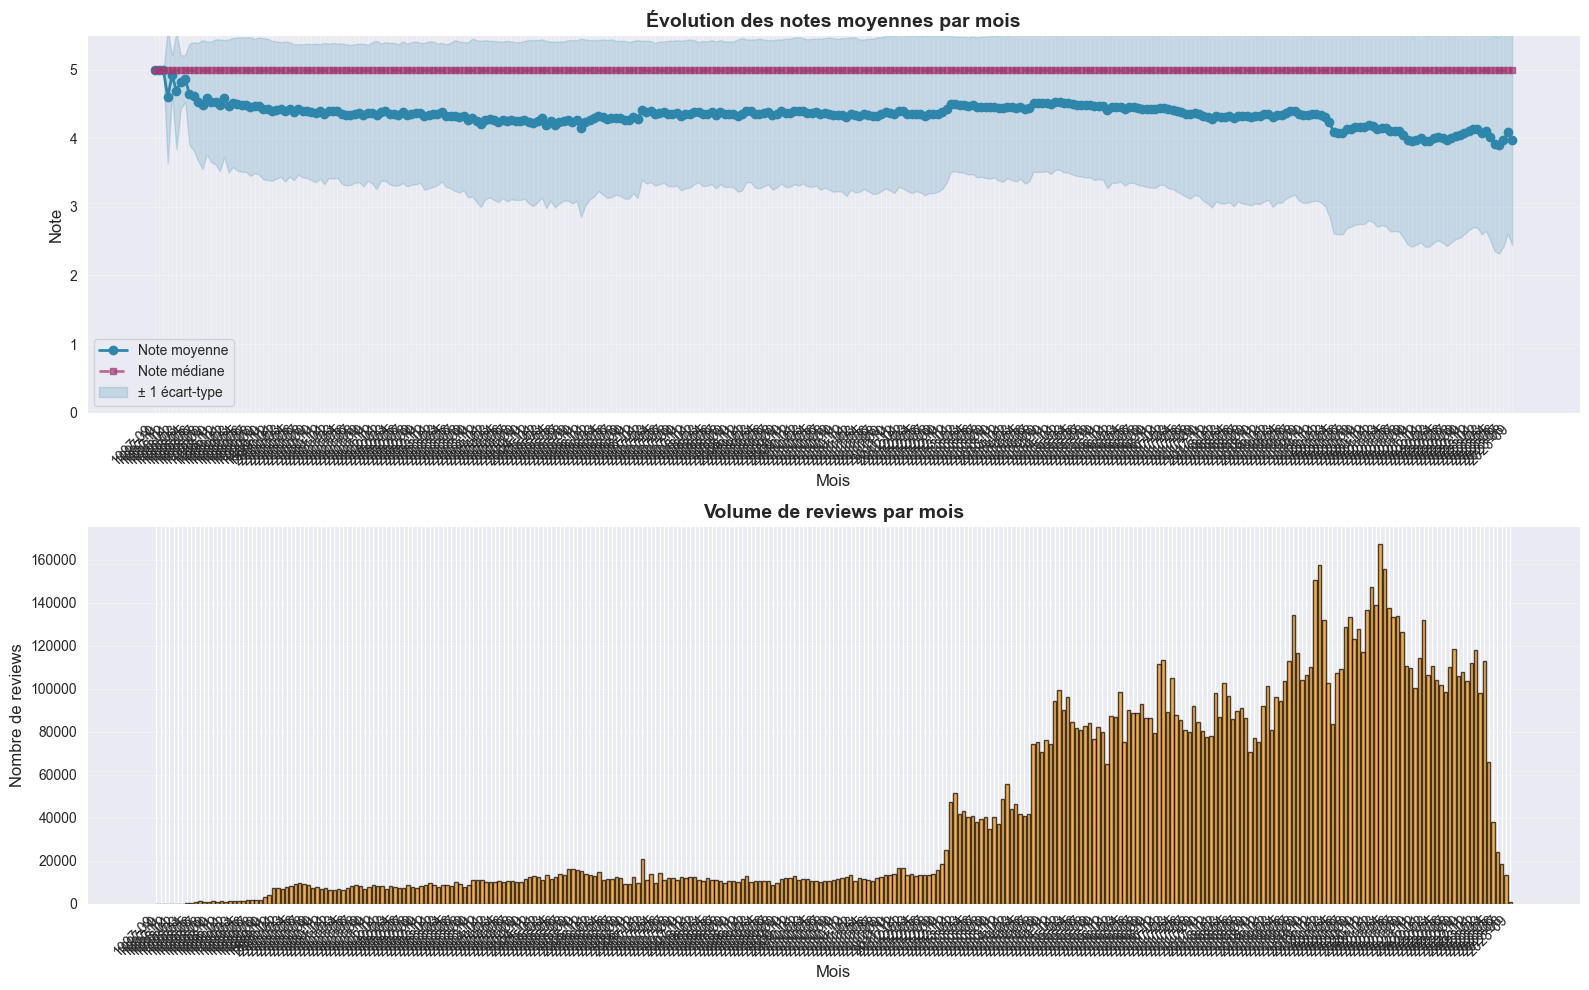

In [60]:
# Visualisation 1 : Évolution des notes moyennes par mois
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Graphique 1 : Note moyenne par mois avec intervalle de confiance
ax1 = axes[0]
ax1.plot(monthly_ratings['year_month_str'], monthly_ratings['mean_rating'],
         marker='o', linewidth=2, markersize=6, label='Note moyenne', color='#2E86AB')
ax1.plot(monthly_ratings['year_month_str'], monthly_ratings['median_rating'],
         marker='s', linewidth=2, markersize=5, label='Note médiane',
         color='#A23B72', alpha=0.7, linestyle='--')

# Ajouter une bande pour l'écart-type
ax1.fill_between(range(len(monthly_ratings)),
                  monthly_ratings['mean_rating'] - monthly_ratings['std_rating'],
                  monthly_ratings['mean_rating'] + monthly_ratings['std_rating'],
                  alpha=0.2, color='#2E86AB', label='± 1 écart-type')

ax1.set_xlabel('Mois', fontsize=12)
ax1.set_ylabel('Note', fontsize=12)
ax1.set_title('Évolution des notes moyennes par mois', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 5.5])

# Rotation des labels de l'axe x
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Graphique 2 : Nombre de reviews par mois
ax2 = axes[1]
ax2.bar(monthly_ratings['year_month_str'], monthly_ratings['num_reviews'],
        color='#F18F01', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Mois', fontsize=12)
ax2.set_ylabel('Nombre de reviews', fontsize=12)
ax2.set_title('Volume de reviews par mois', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Rotation des labels
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Visualisation 2 : Évolution annuelle et par trimestre

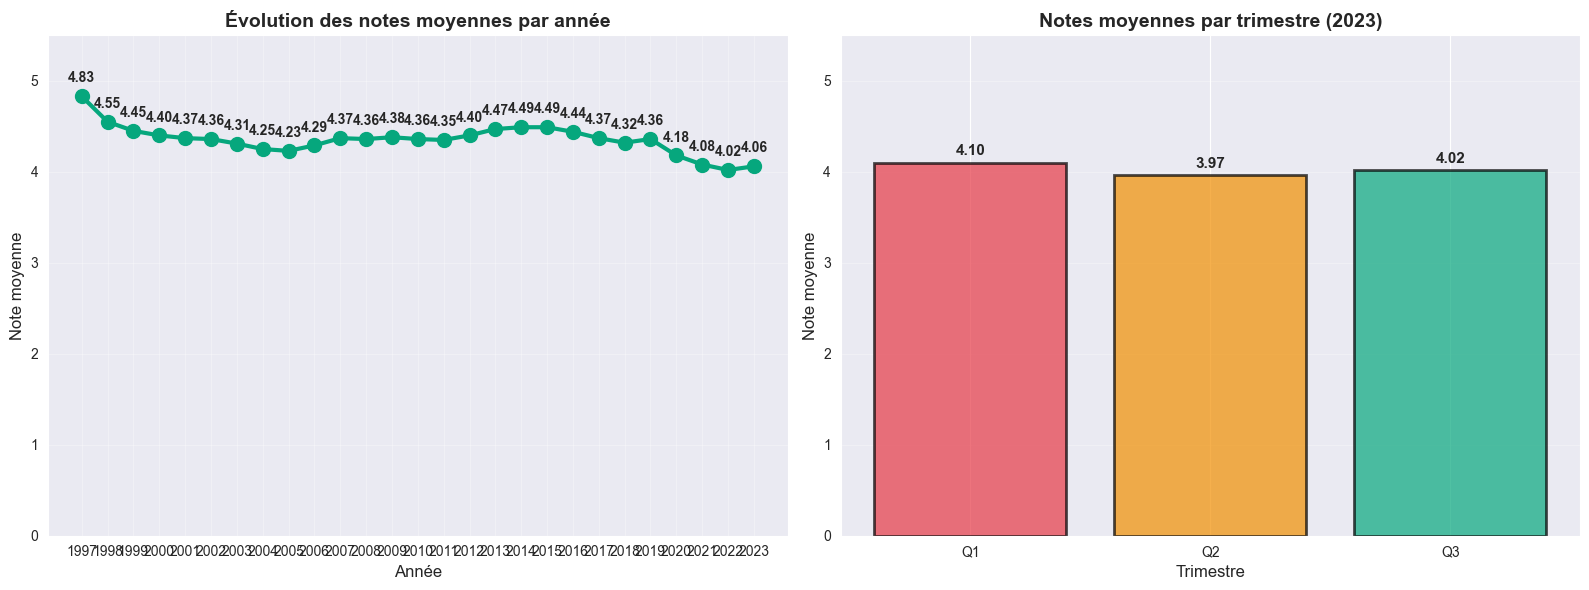

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1 : Évolution annuelle
if len(yearly_ratings) > 1:
    ax1 = axes[0]
    years = yearly_ratings.index.astype(str)
    ax1.plot(years, yearly_ratings['mean_rating'], marker='o',
            linewidth=3, markersize=10, color='#06A77D')
    ax1.set_xlabel('Année', fontsize=12)
    ax1.set_ylabel('Note moyenne', fontsize=12)
    ax1.set_title('Évolution des notes moyennes par année', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 5.5])

    # Ajouter les valeurs sur les points
    for i, (year, rating) in enumerate(zip(years, yearly_ratings['mean_rating'])):
        ax1.annotate(f'{rating:.2f}',
                    (i, rating),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center',
                    fontsize=10,
                    fontweight='bold')

# Graphique 2 : Distribution par trimestre (dernière année)
ax2 = axes[1]
quarterly_ratings = reviews_latest_year.groupby('quarter')['rating'].mean()
quarters_labels = [f'Q{q}' for q in quarterly_ratings.index]

bars = ax2.bar(quarters_labels, quarterly_ratings.values,
               color=['#E63946', '#F18F01', '#06A77D', '#2E86AB'],
               alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_xlabel('Trimestre', fontsize=12)
ax2.set_ylabel('Note moyenne', fontsize=12)
ax2.set_title(f'Notes moyennes par trimestre ({latest_year})', fontsize=14, fontweight='bold')
ax2.set_ylim([0, 5.5])
ax2.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


#### Visualisation 3 : Heatmap de la distribution des notes par mois

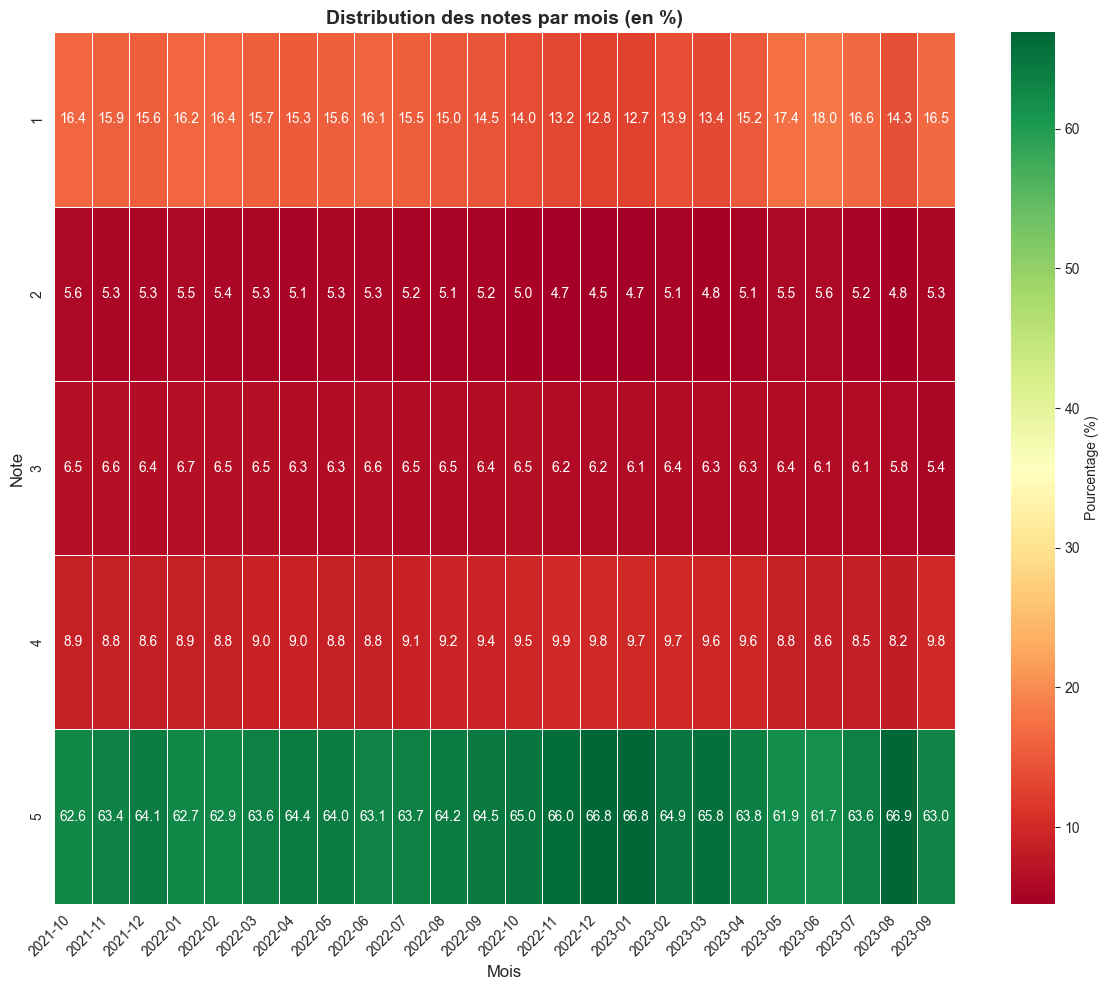

In [62]:
# Créer une distribution des notes par mois
monthly_rating_dist = pd.crosstab(
    reviews_df['year_month'].astype(str),
    reviews_df['rating']
)

# Normaliser pour avoir des pourcentages
monthly_rating_dist_pct = monthly_rating_dist.div(monthly_rating_dist.sum(axis=1), axis=0) * 100

# Limiter aux 24 derniers mois pour la lisibilité
if len(monthly_rating_dist_pct) > 24:
    monthly_rating_dist_pct = monthly_rating_dist_pct.tail(24)

plt.figure(figsize=(12, 10))
sns.heatmap(monthly_rating_dist_pct.T, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'Pourcentage (%)'}, linewidths=0.5)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Note', fontsize=12)
plt.title('Distribution des notes par mois (en %)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Visualisation 4 : Tendance avec moyenne mobile

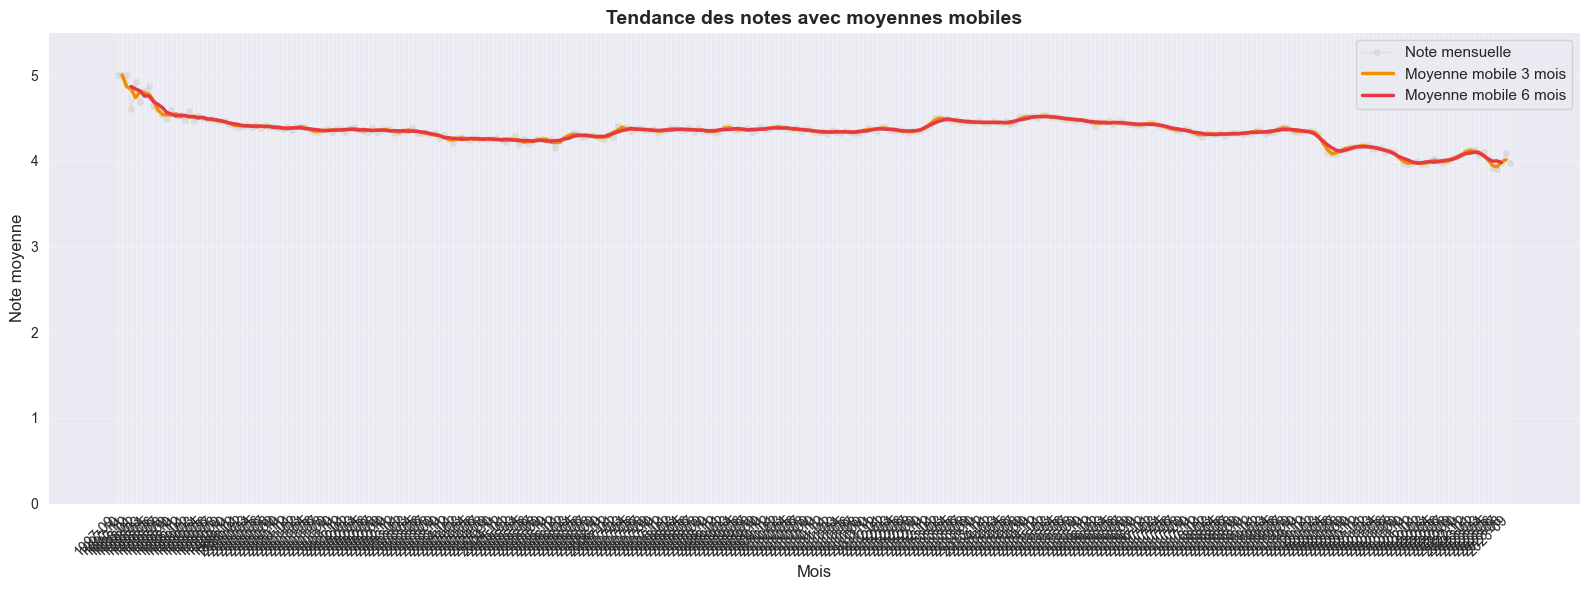

In [63]:
# Calculer les moyennes mobiles
monthly_ratings['MA_3'] = monthly_ratings['mean_rating'].rolling(window=3, center=True).mean()
monthly_ratings['MA_6'] = monthly_ratings['mean_rating'].rolling(window=6, center=True).mean()

plt.figure(figsize=(16, 6))
plt.plot(monthly_ratings['year_month_str'], monthly_ratings['mean_rating'],
         marker='o', linewidth=1, markersize=4, label='Note mensuelle',
         color='lightgray', alpha=0.5)
plt.plot(monthly_ratings['year_month_str'], monthly_ratings['MA_3'],
         linewidth=2.5, label='Moyenne mobile 3 mois', color='#F18F01')
plt.plot(monthly_ratings['year_month_str'], monthly_ratings['MA_6'],
         linewidth=2.5, label='Moyenne mobile 6 mois', color='#E63946')

plt.xlabel('Mois', fontsize=12)
plt.ylabel('Note moyenne', fontsize=12)
plt.title('Tendance des notes avec moyennes mobiles', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 5.5])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
